<a href="https://colab.research.google.com/github/chuducthang77/Machine-Learning-tutorials-and-notes/blob/main/5_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Transposed convolution

- Assumption: 2d convolution, squared kernel, padding = (1,1), kernel is an odd number
- Input: Matrix (n $\times$ m), kernel = ($k_n, k_m$), padding = ($p_n, p_m$), stride = ($s_n, s_m$)
- Output: Matrix ($(n - 1) \times s_n - 2 \times p_n + k_n, (m-1) \times s_m - 2 \times p_m + k_m$)
- Remark: Transposed convolution will not "undo" the convolution operation!
- Refer to this [link](https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967)

The standard version of convolution

In [ ]:
import numpy as np
import math
import torch
import torch.nn.functional as F

inputs = np.array([[3, 5, 2, 7], [4, 1, 3, 8], [6, 3, 8, 2], [9, 6, 1, 5]])
kernel = np.array([[1, 2, 1], [2, 1, 2], [1, 1, 2]])

def standard_convole(m, k, padding = 0, stride = 1):
    m_rows, m_cols = len(m), len(m[0]) # matrix rows, cols
    k_rows, k_cols = len(k), len(k[0]) # kernel rows, cols

    rows = math.floor((m_rows + 2 * padding - k_rows) / stride) + 1 # result matrix rows
    cols = math.floor((m_cols + 2 * padding - k_cols) / stride) + 1 # result matrix cols

    if padding:
      m_new = np.zeros((m_rows + 2, m_cols + 2))
      m_new[1:1+m_rows, 1:1+m_cols] = m
      m = m_new

    v = np.zeros((rows, cols), dtype=m.dtype) # result matrix

    for r in range(rows):
        for c in range(cols):
            v[r][c] = np.sum(m[r * stride : r * stride + k_rows, c * stride : c * stride + k_cols] * k) # sum of the element-wise multiplication
    return v


print('Case 1: No padding, no stride')
output = standard_convole(inputs, kernel)
print(output)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0) ))
print('----------------')
print('Case 2: Padding, no stride')
output = standard_convole(inputs, kernel, padding = 1)
print(output)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), padding=1))
print('----------------')
print('Case 3: Padding, stride 2')
output = standard_convole(inputs, kernel, padding = 1, stride = 2)
print(output)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), padding=1, stride=2))
print('----------------')
print('Case 4: No padding, stride 2')
output = standard_convole(inputs, kernel, stride = 2)
print(output)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), stride = 2 ))


Case 1: No padding, no stride
[[55 52]
 [57 50]]
tensor([[[[55, 52],
          [57, 50]]]])
----------------
Case 2: Padding, no stride
[[19. 26. 46. 22.]
 [29. 55. 52. 40.]
 [42. 57. 50. 43.]
 [36. 46. 44. 19.]]
tensor([[[[19, 26, 46, 22],
          [29, 55, 52, 40],
          [42, 57, 50, 43],
          [36, 46, 44, 19]]]])
----------------
Case 3: Padding, stride 2
[[19. 46.]
 [42. 50.]]
tensor([[[[19, 46],
          [42, 50]]]])
----------------
Case 4: No padding, stride 2
[[55]]
tensor([[[[55]]]])


The matrix-multiplication version of convolution

In [ ]:
def different_convole(m, k, padding=0, stride =1):
  # v: Return matrix
  # n: Expanded kernel
  # m: input
  # k: Original kernel

  m_rows, m_cols = len(m), len(m[0])
  k_rows, k_cols = len(k), len(k[0])

  # Calculate the given dimension
  rows = math.floor((m_rows + 2 * padding - k_rows) / stride) + 1 # result matrix rows
  cols = math.floor((m_cols + 2 * padding - k_cols) / stride) + 1 # result matrix cols

  if padding:
    m_new = np.zeros((m_rows + 2, m_cols + 2))
    m_new[1:1+m_rows, 1:1+m_cols] = m
    m = m_new
    m_rows, m_cols = len(m), len(m[0]) # Update m_rows and m_cols for later use

  v = np.zeros((rows, cols), dtype=m.dtype)
  n = np.zeros((rows * cols, m_rows, m_cols), dtype=m.dtype)

  # Padding the kernel with appropriate
  i = 0
  for r in range(rows):
    for c in range(cols):
      n[i][r * stride : r * stride + k_rows, c * stride : c * stride + k_cols] = k
      i += 1

  # Flatten the original matrix
  m = m.flatten().reshape(-1,1)

  # Reshape the expanded kernel
  n = n.reshape(rows * cols, -1)

  v = (n @ m).reshape(rows, cols)

  return v

print('Case 1: No padding, no stride')
output1 = different_convole(inputs, kernel)
print(output1)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0) ))
print('----------------')
print('Case 2: Padding, no stride')
output2 = different_convole(inputs, kernel, padding = 1)
print(output2)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), padding=1))
print('----------------')
print('Case 3: Padding, stride 2')
output3 = different_convole(inputs, kernel, padding = 1, stride = 2)
print(output3)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), padding=1, stride=2))
print('----------------')
print('Case 4: No padding, stride 2')
output4 = different_convole(inputs, kernel, stride = 2)
print(output4)
print(F.conv2d(torch.from_numpy(inputs).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0), stride = 2 ))


Case 1: No padding, no stride
[[55 52]
 [57 50]]
tensor([[[[55, 52],
          [57, 50]]]])
----------------
Case 2: Padding, no stride
[[19. 26. 46. 22.]
 [29. 55. 52. 40.]
 [42. 57. 50. 43.]
 [36. 46. 44. 19.]]
tensor([[[[19, 26, 46, 22],
          [29, 55, 52, 40],
          [42, 57, 50, 43],
          [36, 46, 44, 19]]]])
----------------
Case 3: Padding, stride 2
[[19. 46.]
 [42. 50.]]
tensor([[[[19, 46],
          [42, 50]]]])
----------------
Case 4: No padding, stride 2
[[55]]
tensor([[[[55]]]])



Transposed convolution inspired from original convolution.

In [ ]:
def transpose_convole_regular(m, k, padding = 0, stride = 1):
  m_rows, m_cols = len(m), len(m[0])
  k_rows, k_cols = len(k), len(k[0])

  # Calculate the given dimension
  rows = (m_rows - 1) * stride + k_rows
  cols = (m_cols - 1) * stride + k_cols

  v = np.zeros((rows, cols), dtype=m.dtype)

  for r in range(m_rows):
    for c in range(m_cols):
      v[r * stride : r * stride + k_rows, c * stride : c * stride + k_cols] += (m[r][c] * k)


  if padding:
    return v[1:rows-1, 1:cols-1]

  return v

print('Case 1: No padding, no stride')
print(transpose_convole_regular(output1, kernel))
print(F.conv_transpose2d(torch.from_numpy(output1).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0) ))
print('----------------')
print('Case 2: Padding, no stride')
print(transpose_convole_regular(output2, kernel, padding=1))
print(F.conv_transpose2d(torch.from_numpy(output2).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), padding=1))
print('----------------')
print('Case 3: Padding, stride 2')
print(transpose_convole_regular(output3, kernel, stride=2, padding=1))
print(F.conv_transpose2d(torch.from_numpy(output3).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), stride=2, padding=1))
print('----------------')
print('Case 4: No padding, stride 2')
print(transpose_convole_regular(output3, kernel, stride=2))
print(F.conv_transpose2d(torch.from_numpy(output3).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), stride=2))

Case 1: No padding, no stride
[[ 55 162 159  52]
 [167 323 319 154]
 [169 264 326 204]
 [ 57 107 164 100]]
tensor([[[[ 55, 162, 159,  52],
          [167, 323, 319, 154],
          [169, 264, 326, 204],
          [ 57, 107, 164, 100]]]])
----------------
Case 2: Padding, no stride
[[184. 347. 341. 246.]
 [325. 533. 562. 394.]
 [358. 578. 605. 369.]
 [227. 397. 381. 250.]]
tensor([[[[184., 347., 341., 246.],
          [325., 533., 562., 394.],
          [358., 578., 605., 369.],
          [227., 397., 381., 250.]]]], dtype=torch.float64)
----------------
Case 3: Padding, stride 2
[[ 19. 130.  46.]
 [103. 176. 146.]
 [ 42. 184.  50.]]
tensor([[[[ 19., 130.,  46.],
          [103., 176., 146.],
          [ 42., 184.,  50.]]]], dtype=torch.float64)
----------------
Case 4: No padding, stride 2
[[ 19.  38.  65.  92.  46.]
 [ 38.  19. 130.  46.  92.]
 [ 61. 103. 176. 146. 142.]
 [ 84.  42. 184.  50. 100.]
 [ 42.  42. 134.  50. 100.]]
tensor([[[[ 19.,  38.,  65.,  92.,  46.],
          [ 38.,

The transposed convolution inspired from the matrix-multiplication convolution version

In [ ]:
def transpose_convole(m, k, padding = 0, stride = 1):
  # v: Return matrix
  # n: Expanded kernel
  # m: input
  # k: Original kernel
  m_rows, m_cols = len(m), len(m[0])
  k_rows, k_cols = len(k), len(k[0])

  # Calculate the given dimension
  rows = (m_rows - 1) * stride + k_rows
  cols = (m_cols - 1) * stride + k_cols

  v = np.zeros((rows, cols), dtype=m.dtype)
  n = np.zeros((m_rows * m_cols, rows, cols), dtype=m.dtype)

  i = 0
  for r in range(m_rows):
    for c in range(m_cols):
      n[i][r * stride : r * stride + k_rows, c * stride : c * stride + k_cols] = k
      i += 1

  # Flatten the original matrix
  m = m.flatten().reshape(-1,1)

  # Reshape the expanded kernel
  n = n.reshape(m_rows * m_cols, -1).T

  v = (n @ m).reshape(rows, cols)

  if padding:
    return v[1:rows-1, 1:cols-1]

  return v


print('Case 1: No padding, no stride')
print(transpose_convole(output1, kernel))
print(F.conv_transpose2d(torch.from_numpy(output1).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0) ))
print('----------------')
print('Case 2: Padding, no stride')
print(transpose_convole(output2, kernel, padding=1))
print(F.conv_transpose2d(torch.from_numpy(output2).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), padding=1))
print('----------------')
print('Case 3: Padding, stride 2')
print(transpose_convole(output3, kernel, stride=2, padding=1))
print(F.conv_transpose2d(torch.from_numpy(output3).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), stride=2, padding=1))
print('----------------')
print('Case 4: No padding, stride 2')
print(transpose_convole(output3, kernel, stride=2))
print(F.conv_transpose2d(torch.from_numpy(output3).unsqueeze(0).unsqueeze(0), torch.from_numpy(kernel.astype(np.double)).unsqueeze(0).unsqueeze(0), stride=2))

Case 1: No padding, no stride
[[ 55 162 159  52]
 [167 323 319 154]
 [169 264 326 204]
 [ 57 107 164 100]]
tensor([[[[ 55, 162, 159,  52],
          [167, 323, 319, 154],
          [169, 264, 326, 204],
          [ 57, 107, 164, 100]]]])
----------------
Case 2: Padding, no stride
[[184. 347. 341. 246.]
 [325. 533. 562. 394.]
 [358. 578. 605. 369.]
 [227. 397. 381. 250.]]
tensor([[[[184., 347., 341., 246.],
          [325., 533., 562., 394.],
          [358., 578., 605., 369.],
          [227., 397., 381., 250.]]]], dtype=torch.float64)
----------------
Case 3: Padding, stride 2
[[ 19. 130.  46.]
 [103. 176. 146.]
 [ 42. 184.  50.]]
tensor([[[[ 19., 130.,  46.],
          [103., 176., 146.],
          [ 42., 184.,  50.]]]], dtype=torch.float64)
----------------
Case 4: No padding, stride 2
[[ 19.  38.  65.  92.  46.]
 [ 38.  19. 130.  46.  92.]
 [ 61. 103. 176. 146. 142.]
 [ 84.  42. 184.  50. 100.]
 [ 42.  42. 134.  50. 100.]]
tensor([[[[ 19.,  38.,  65.,  92.,  46.],
          [ 38.,

# Problem 2: Denoise image

In [ ]:
import torch
import torch.cuda as cuda
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

# Torchvision module contains various utilities, classes, models and datasets
# used towards computer vision usecases
from torchvision import datasets
from torchvision import transforms

from torch.nn import functional as F

In [ ]:
transform=transforms.Compose([transforms.ToTensor()])

cifar10_train = datasets.CIFAR10('./data.cifar10', train=True, download=True, transform=transform)
cifar10_valid = datasets.CIFAR10('./data.cifar10', train=False, download=True, transform=transform)
batch_size = 250 # Reduce this if you get out-of-memory error
learning_rate = 0.001
noise_level = 0.1
cifar10_train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=1)
cifar10_valid_loader = torch.utils.data.DataLoader(cifar10_valid, batch_size=batch_size, shuffle=True, num_workers=1)

100%|██████████| 170498071/170498071 [00:13<00:00, 12693936.43it/s]


Extracting ./data.cifar10/cifar-10-python.tar.gz to ./data.cifar10
Files already downloaded and verified


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def show_img(orig, noisy, denoised):
    fig=plt.figure()

    orig = orig.swapaxes(0, 1).swapaxes(1, 2)
    noisy = noisy.swapaxes(0, 1).swapaxes(1, 2)
    denoised = denoised.swapaxes(0, 1).swapaxes(1, 2)

    # Normalize for display purpose
    orig     = (orig - orig.min()) / (orig.max() - orig.min())
    noisy    = (noisy - noisy.min()) / (noisy.max() - noisy.min())
    denoised = (denoised - denoised.min()) / (denoised.max() - denoised.min())

    fig.add_subplot(1, 3, 1, title='Original')
    plt.imshow(orig)

    fig.add_subplot(1, 3, 2, title='Noisy')
    plt.imshow(noisy)

    fig.add_subplot(1, 3, 3, title='Denoised')
    plt.imshow(denoised)

    fig.subplots_adjust(wspace = 0.5)
    plt.show()

In [ ]:
class DenoisingAutoencoder(nn.Module):

    def __init__(self):

        super(DenoisingAutoencoder, self).__init__()
                                                            # 32 x 32 x 3 (input)

        self.conv1e = nn.Conv2d(3, 24, 3, padding=2)        # 30 x 30 x 24
        self.conv2e = nn.Conv2d(24, 48, 3, padding=2)       # 28 x 28 x 48
        self.conv3e = nn.Conv2d(48, 96, 3, padding=2)       # 26 x 26 x 96
        self.conv4e = nn.Conv2d(96, 128, 3, padding=2)      # 24 x 24 x 128
        self.conv5e = nn.Conv2d(128, 256, 3, padding=2)     # 22 x 22 x 256
        self.mp1e   = nn.MaxPool2d(2, return_indices=True)  # 11 x 11 x 256

        self.mp1d = nn.MaxUnpool2d(2)
        self.conv5d = nn.ConvTranspose2d(256, 128, 3, padding=2)
        self.conv4d = nn.ConvTranspose2d(128, 96, 3, padding=2)
        self.conv3d = nn.ConvTranspose2d(96, 48, 3, padding=2)
        self.conv2d = nn.ConvTranspose2d(48, 24, 3, padding=2)
        self.conv1d = nn.ConvTranspose2d(24, 3, 3, padding=2)


    def forward(self, x):
        # Encoder
        x = self.conv1e(x)
        x = F.relu(x)
        x = self.conv2e(x)
        x = F.relu(x)
        x = self.conv3e(x)
        x = F.relu(x)
        x = self.conv4e(x)
        x = F.relu(x)
        x = self.conv5e(x)
        x = F.relu(x)
        x, i = self.mp1e(x)

         # Decoder
        x = self.mp1d(x, i)
        x = self.conv5d(x)
        x = F.relu(x)
        x = self.conv4d(x)
        x = F.relu(x)
        x = self.conv3d(x)
        x = F.relu(x)
        x = self.conv2d(x)
        x = F.relu(x)
        x = self.conv1d(x)
        x = F.relu(x)

        return x


# model = DenoisingAutoencoder().to(device)
# print(model)

# summary(model, (3, 32, 32)) # Useful to have a testing size of image during model building

Iteration  1


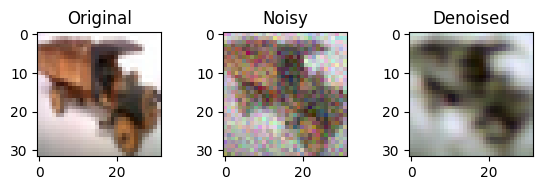

Iteration  2


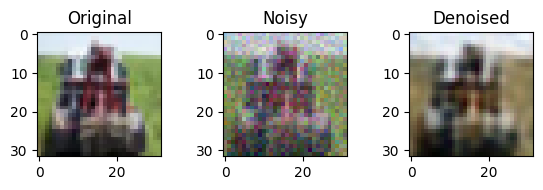

Iteration  3


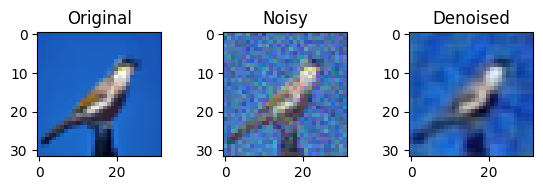

Iteration  4


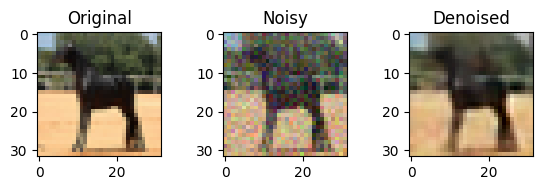

Iteration  5


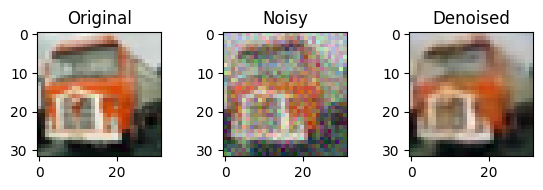

Iteration  6


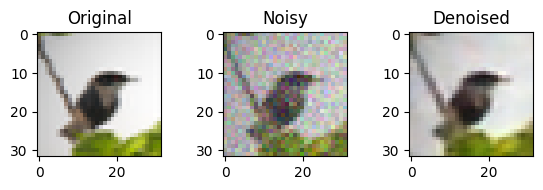

Iteration  7


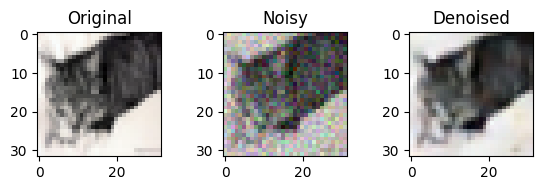

Iteration  8


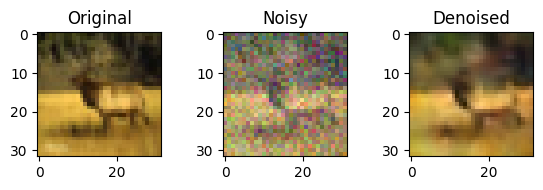

Iteration  9


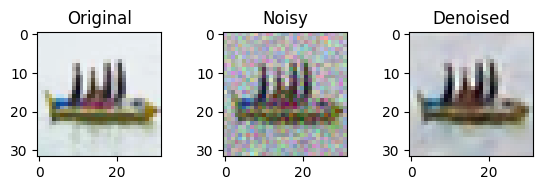

Iteration  10


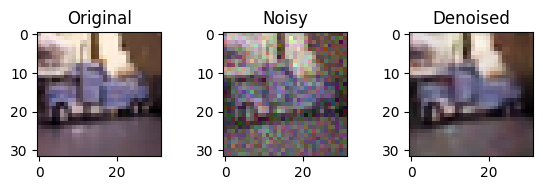

In [ ]:
# Create the model and define loss and optimizer
# Initialize the model and optimizer
autoencoder = DenoisingAutoencoder().cuda()
parameters = list(autoencoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

train_loss = []

for i in range(10):

    # Let's train the model

    total_loss = 0.0
    total_iter = 0
    autoencoder.train()
    for image, label in cifar10_train_loader:

        noise = torch.randn(image.shape[0], 3, 32, 32) * noise_level
        image_n = torch.add(image, noise)

        image = Variable(image).cuda()
        image_n = Variable(image_n).cuda()

        optimizer.zero_grad()
        output = autoencoder(image_n)

        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        total_iter += 1
        total_loss += loss.item()


    # Let's visualize the first image of the last batch in our validation set
    orig = image[0].cpu()
    noisy = image_n[0].cpu()
    denoised = output[0].cpu()

    orig = orig.data.numpy()
    noisy = noisy.data.numpy()
    denoised = denoised.data.numpy()

    print("Iteration ", i+1)
    show_img(orig, noisy, denoised)

    train_loss.append(total_loss / total_iter)



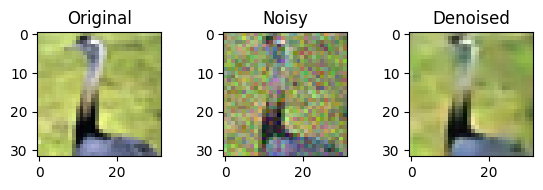

In [ ]:
import random

img, _ = random.choice(cifar10_valid)
img    = img.resize_((1, 3, 32, 32))
noise  = torch.randn((1, 3, 32, 32)) * noise_level
img_n  = torch.add(img, noise)

img_n = Variable(img_n).cuda()
denoised = autoencoder(img_n)


show_img(img[0].numpy(), img_n[0].data.cpu().numpy(), denoised[0].data.cpu().numpy())

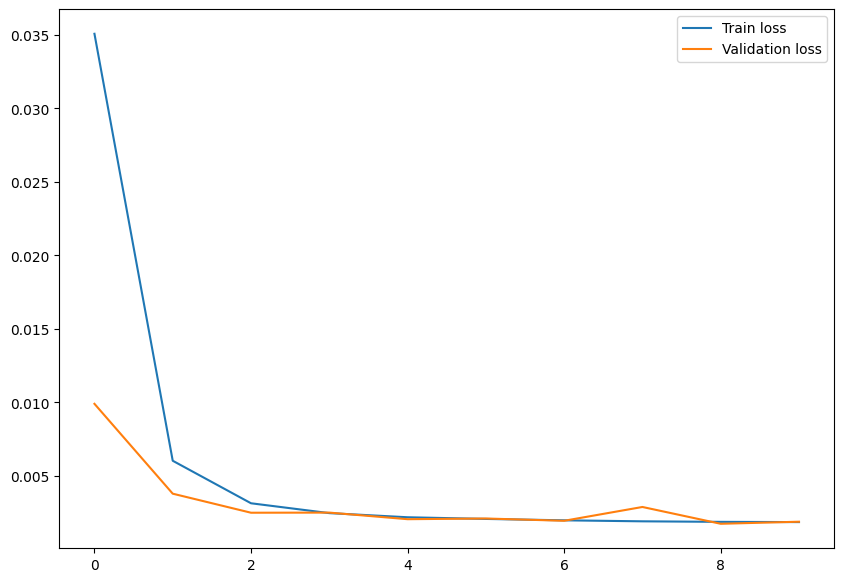

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss, label='Train loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend()
plt.show()

# Problem 3: Dimensionality reduction


In [ ]:
import torch
import torch.cuda as cuda
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

# Torchvision module contains various utilities, classes, models and datasets
# used towards computer vision usecases
from torchvision import datasets
from torchvision import transforms

from torch.nn import functional as F


batch_size = 250 # Reduce this if you get out-of-memory error
learning_rate = 0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform=transforms.Compose([transforms.ToTensor()])

cifar10_train = datasets.CIFAR10('./data.cifar10', train=True, download=True, transform=transform)
cifar10_valid = datasets.CIFAR10('./data.cifar10', train=False, download=True, transform=transform)

cifar10_train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=1)
cifar10_valid_loader = torch.utils.data.DataLoader(cifar10_valid, batch_size=batch_size, shuffle=True, num_workers=1)


100%|██████████| 170498071/170498071 [00:03<00:00, 44156145.41it/s]


Extracting ./data.cifar10/cifar-10-python.tar.gz to ./data.cifar10
Files already downloaded and verified


In [ ]:
def show_img(orig, denoised):
    fig=plt.figure()

    orig = orig.swapaxes(0, 1).swapaxes(1, 2)
    # noisy = noisy.swapaxes(0, 1).swapaxes(1, 2)
    denoised = denoised.swapaxes(0, 1).swapaxes(1, 2)

    # Normalize for display purpose
    orig     = (orig - orig.min()) / (orig.max() - orig.min())
    # noisy    = (noisy - noisy.min()) / (noisy.max() - noisy.min())
    denoised = (denoised - denoised.min()) / (denoised.max() - denoised.min())

    fig.add_subplot(1, 2, 1, title='Original')
    plt.imshow(orig)

    # fig.add_subplot(1, 3, 2, title='Noisy')
    # plt.imshow(noisy)

    fig.add_subplot(1, 2, 2, title='Decoded')
    plt.imshow(denoised)

    fig.subplots_adjust(wspace = 0.5)
    plt.show()

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()


        self.encoder = nn.Sequential(
            nn.Conv2d(
                in_channels=3,      # input height
                out_channels=16,    # n_filters
                kernel_size=3,      # filter size
                stride=1,           # filter movement/step
                padding=1,
            ),
            nn.LeakyReLU(),    # activation
            nn.Conv2d(
                in_channels=16,      # input height
                out_channels=32,    # n_filters
                kernel_size=3,      # filter size
                stride=1,           # filter movement/step
                padding=1,
            ),
            nn.LeakyReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=32,      # input height
                out_channels=32,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.LeakyReLU(),    # activation
            nn.Conv2d(
                in_channels=32,      # input height
                out_channels=64,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.LeakyReLU(),    # activation
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(4096, 1028),
            nn.Linear(1028, 256),
            nn.Linear(256, 2)


        )

        self.decoder = nn.Sequential(
                nn.Linear(2, 256),
                nn.Linear(256, 1028),
                nn.Linear(1028, 4096),

                nn.Unflatten(1, (64, 8, 8)),

                nn.ConvTranspose2d(
                in_channels=64,      # input height
                out_channels=32,    # n_filters
                kernel_size=2,      # filter size
                stride=2,           # filter movement/step
                padding=0,
            ),
            nn.LeakyReLU(),       # activation
            nn.Conv2d(
                in_channels=32,      # input height
                out_channels=32,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.LeakyReLU(),    # activation
           nn.ConvTranspose2d(
                in_channels=32,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.Conv2d(
                in_channels=16,      # input height
                out_channels=16,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.LeakyReLU(),    # activation
             nn.ConvTranspose2d(
                in_channels=16,      # input height
                out_channels=16,    # n_filters
                kernel_size=2,      # filter size
                stride=2,           # filter movement/step
                padding=0,
            ),
            nn.LeakyReLU(),
            nn.Conv2d(
                in_channels=16,      # input height
                out_channels=16,    # n_filters
                kernel_size=3,      # filter size
                stride=1,           # filter movement/step
                padding=1,
            ),
            nn.LeakyReLU(),    # activation
           nn.ConvTranspose2d(
                in_channels=16,      # input height
                out_channels=3,    # n_filters
                kernel_size=5,      # filter size
                stride=1,           # filter movement/step
                padding=2,
            ),
            nn.Conv2d(
                in_channels=3,      # input height
                out_channels=3,    # n_filters
                kernel_size=3,      # filter size
                stride=1,           # filter movement/step
                padding=1,
            ),
            nn.ReLU(), # activation
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
from torchsummary import summary

model = AutoEncoder().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         LeakyReLU-2           [-1, 16, 32, 32]               0
            Conv2d-3           [-1, 32, 32, 32]           4,640
         LeakyReLU-4           [-1, 32, 32, 32]               0
         MaxPool2d-5           [-1, 32, 16, 16]               0
            Conv2d-6           [-1, 32, 16, 16]          25,632
         LeakyReLU-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          51,264
         LeakyReLU-9           [-1, 64, 16, 16]               0
        MaxPool2d-10             [-1, 64, 8, 8]               0
          Flatten-11                 [-1, 4096]               0
           Linear-12                    [-1, 2]           8,194
           Linear-13                 [-1, 4096]          12,288
        Unflatten-14             [-1, 6

Iteration  1


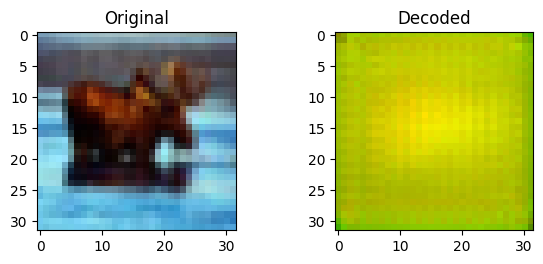

Iteration  2


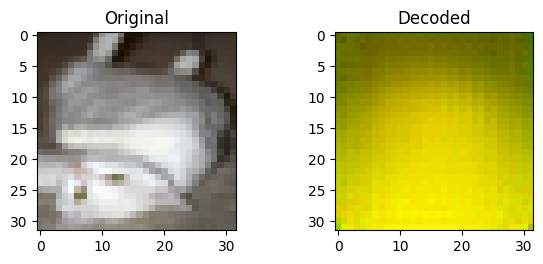

Iteration  3


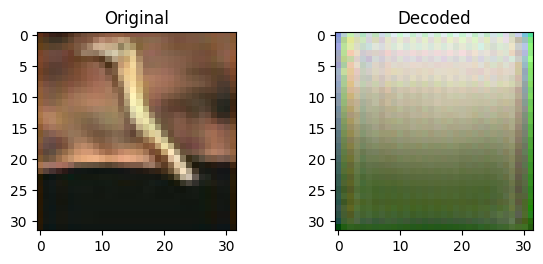

Iteration  4


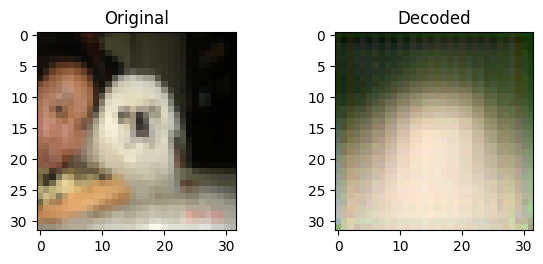

Iteration  5


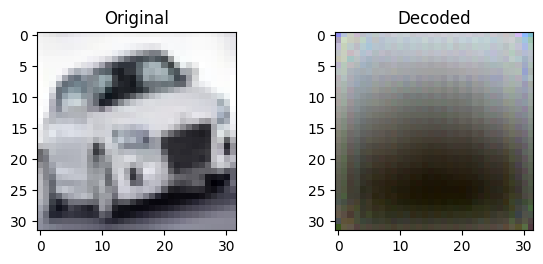

Iteration  6


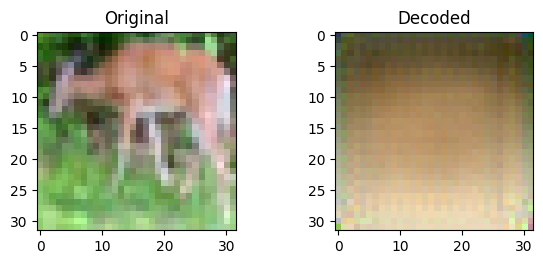

Iteration  7


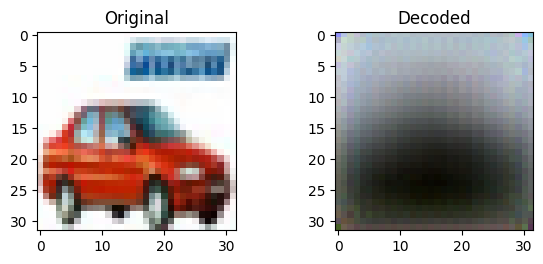

Iteration  8


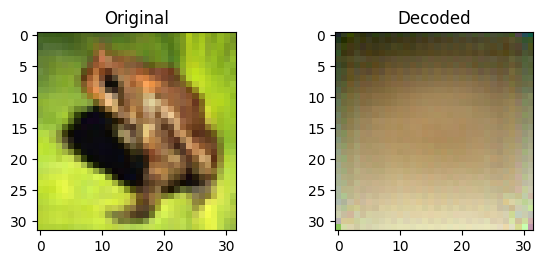

Iteration  9


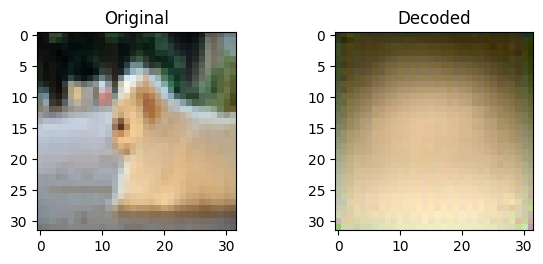

Iteration  10


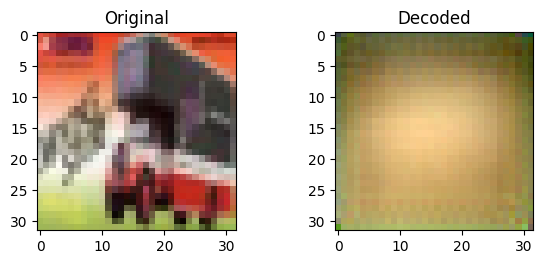

Iteration  11


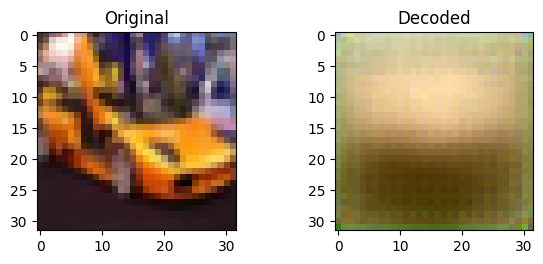

Iteration  12


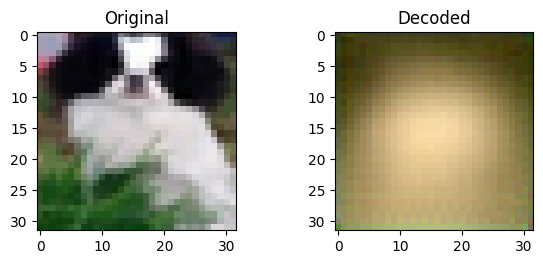

Iteration  13


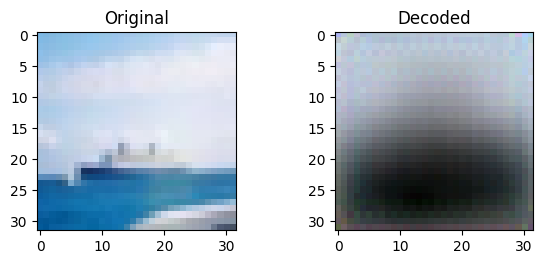

Iteration  14


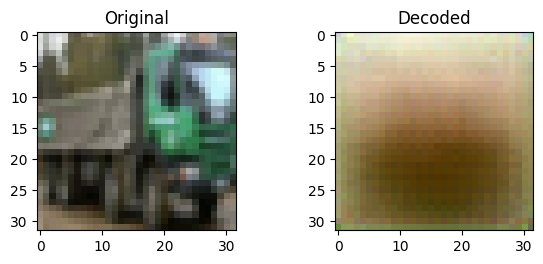

Iteration  15


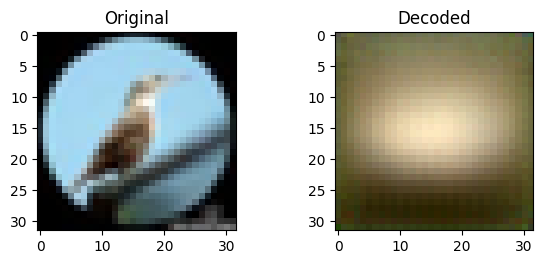

Iteration  16


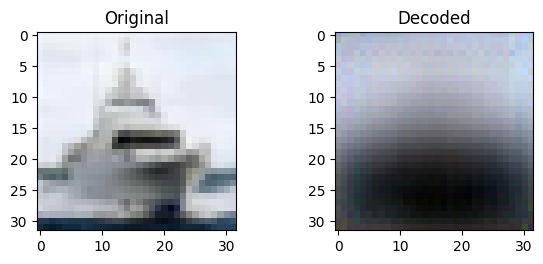

Iteration  17


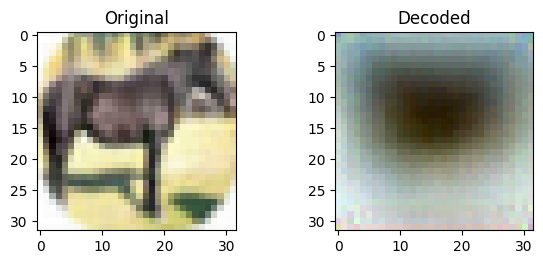

Iteration  18


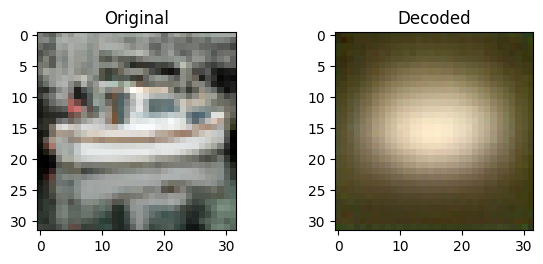

Iteration  19


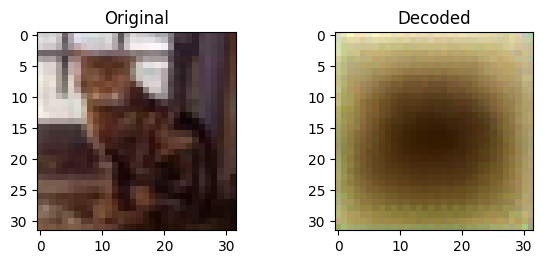

Iteration  20


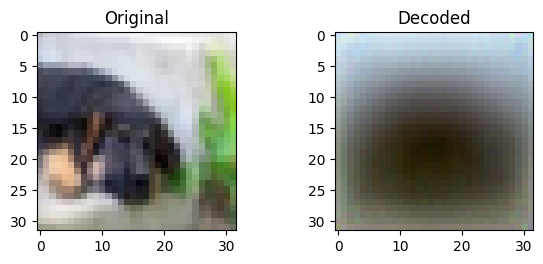

Iteration  21


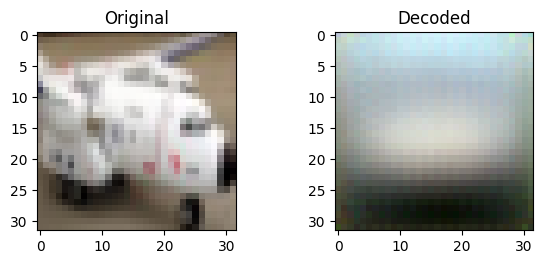

Iteration  22


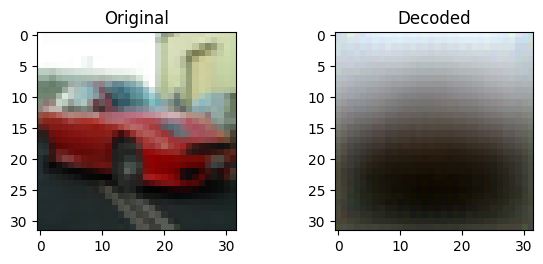

Iteration  23


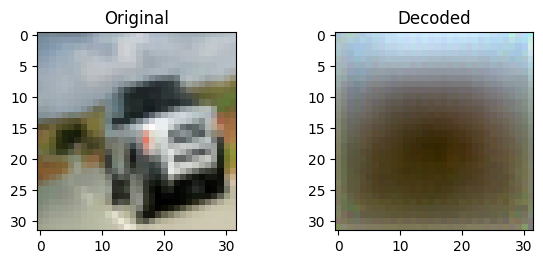

Iteration  24


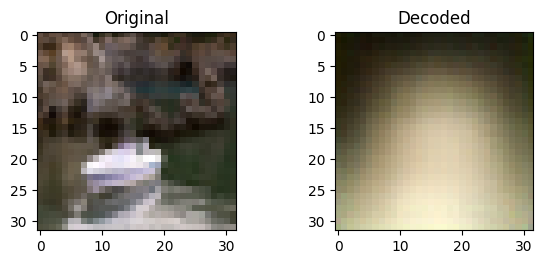

Iteration  25


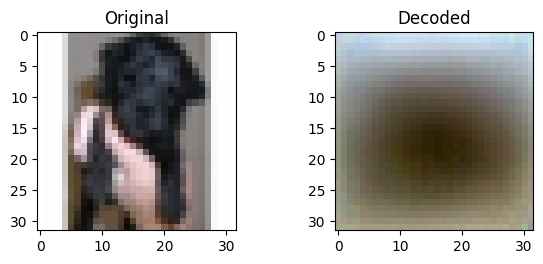

Iteration  26


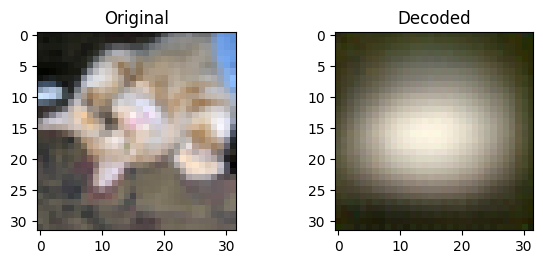

Iteration  27


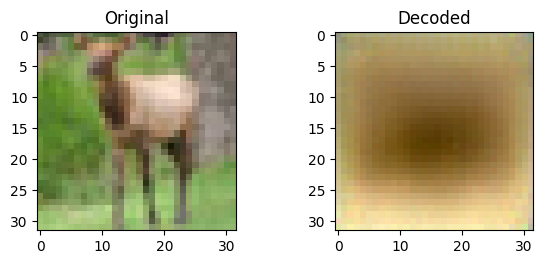

Iteration  28


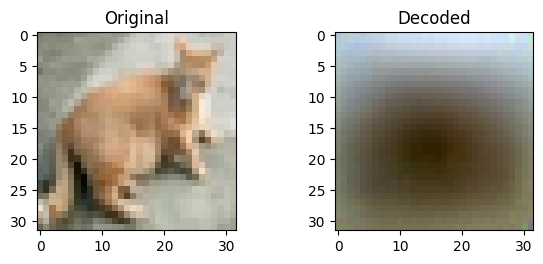

Iteration  29


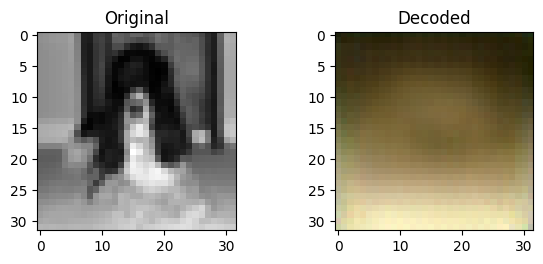

Iteration  30


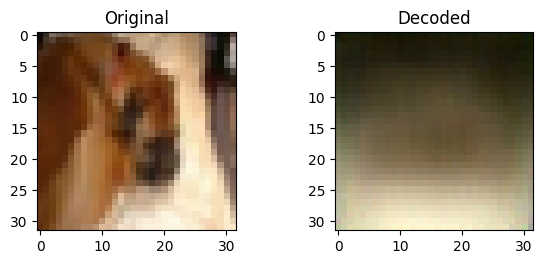

Iteration  31


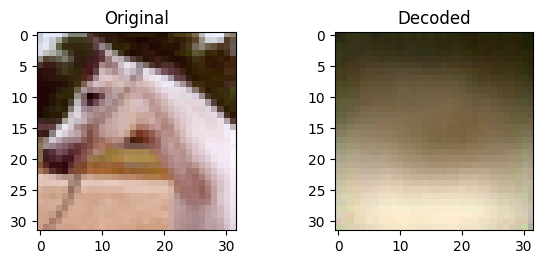

Iteration  32


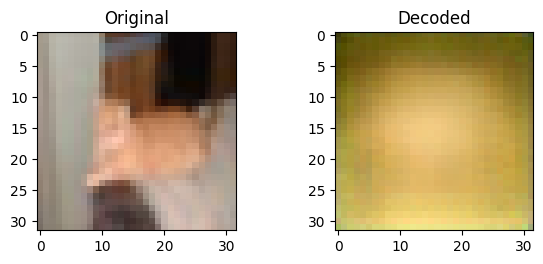

Iteration  33


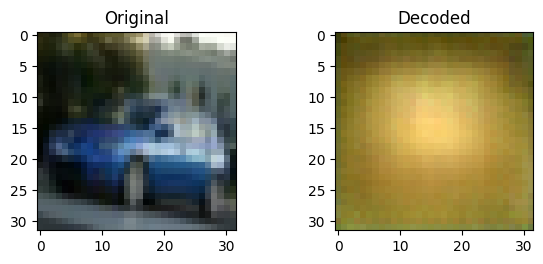

Iteration  34


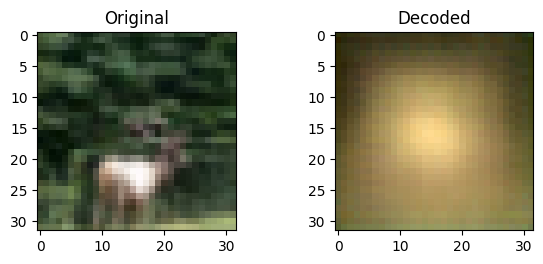

Iteration  35


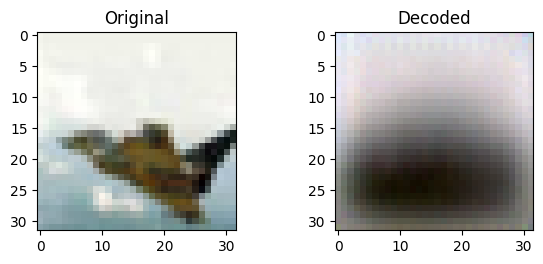

Iteration  36


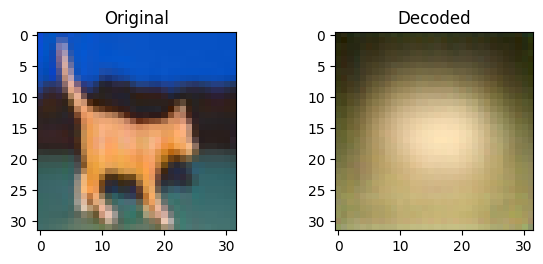

Iteration  37


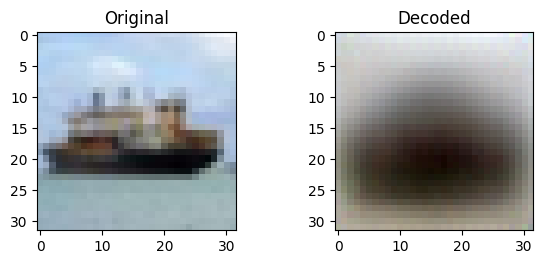

Iteration  38


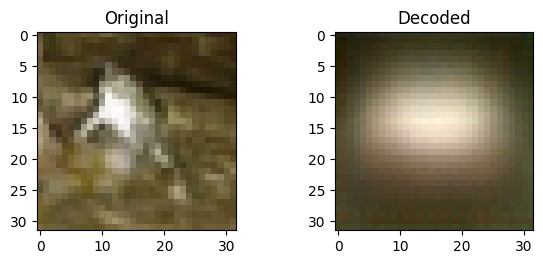

Iteration  39


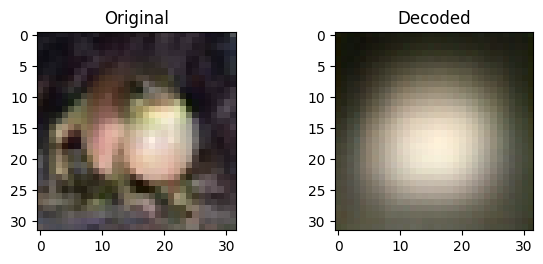

Iteration  40


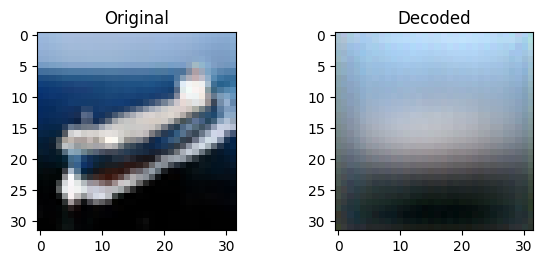

Iteration  41


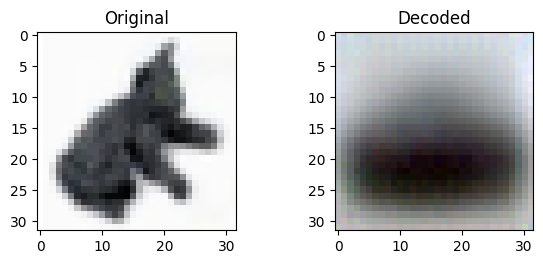

Iteration  42


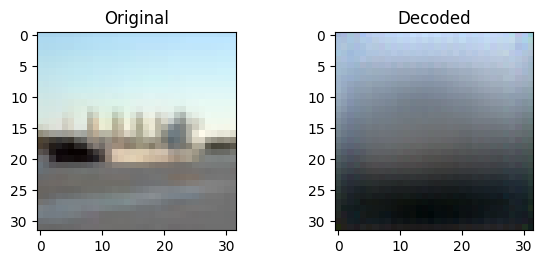

Iteration  43


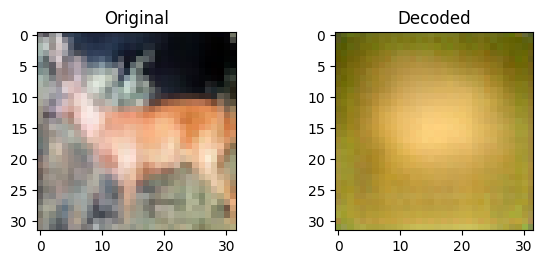

Iteration  44


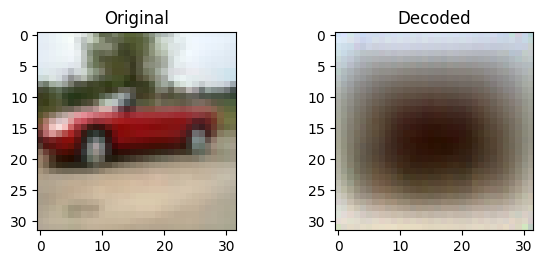

Iteration  45


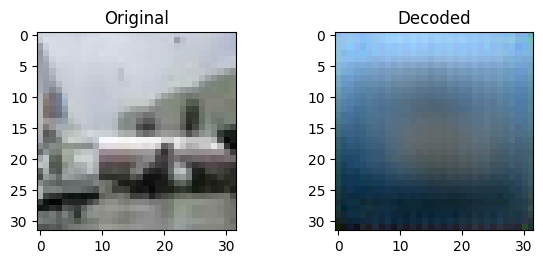

Iteration  46


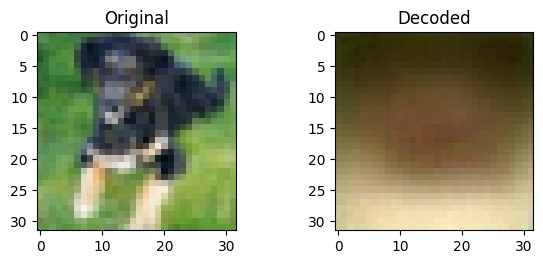

Iteration  47


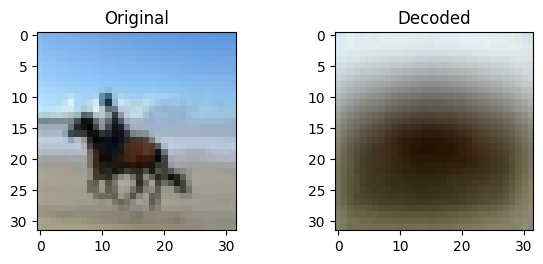

Iteration  48


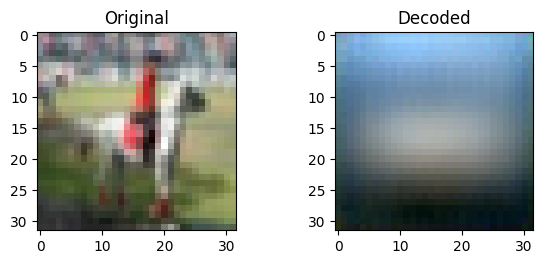

Iteration  49


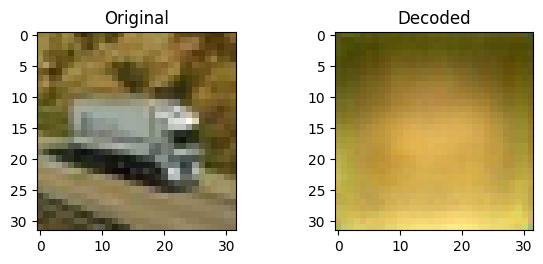

Iteration  50


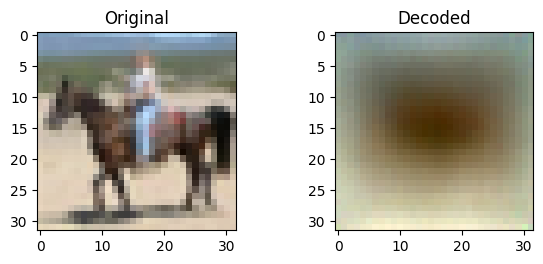

In [ ]:
# Create the model and define loss and optimizer
# Initialize the model and optimizer
autoencoder = AutoEncoder().cuda()
parameters = list(autoencoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)
epochs = 50

train_loss = []
valid_loss = []

for i in range(epochs):

    # Let's train the model

    total_loss = 0.0
    total_iter = 0
    autoencoder.train()
    for image, label in cifar10_train_loader:

        image = image.to(device)
        optimizer.zero_grad()
        output = autoencoder(image)

        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        total_iter += 1
        total_loss += loss.item()


    # Let's visualize the first image of the last batch in our validation set
    orig = image[0].cpu()
    denoised = output[0].cpu()

    orig = orig.data.numpy()
    denoised = denoised.data.numpy()

    print("Iteration ", i+1)
    show_img(orig, denoised)

    train_loss.append(total_loss / total_iter)



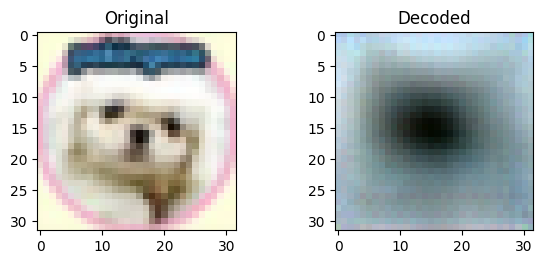

In [ ]:
import random

img, _ = random.choice(cifar10_valid)
img    = img.resize_((1, 3, 32, 32))
img = img.to(device)
denoised = autoencoder(img)


show_img(img[0].data.cpu().numpy(), denoised[0].data.cpu().numpy())

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss, label='Train loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend()
plt.show()

In [ ]:
cifar10_valid_loader = torch.utils.data.DataLoader(cifar10_valid, batch_size=256, shuffle=True, num_workers=1)
img, label = next(iter(cifar10_valid_loader))
img = img.view(-1, 3, 32, 32)
img = img.to(device)
encoded_img = autoencoder.encoder(img)
encoded_img.size()


torch.Size([256, 2])

In [ ]:
from sklearn.decomposition import PCA

cifar10_valid_loader = torch.utils.data.DataLoader(cifar10_valid, batch_size=256, shuffle=True, num_workers=1)
img, label = next(iter(cifar10_valid_loader))
img = img.view(256, -1)
img = img.data.cpu().numpy()

n_components = 2
pca = PCA(n_components=n_components)
reduced_image = pca.fit_transform(img)
reduced_image.shape

(256, 2)

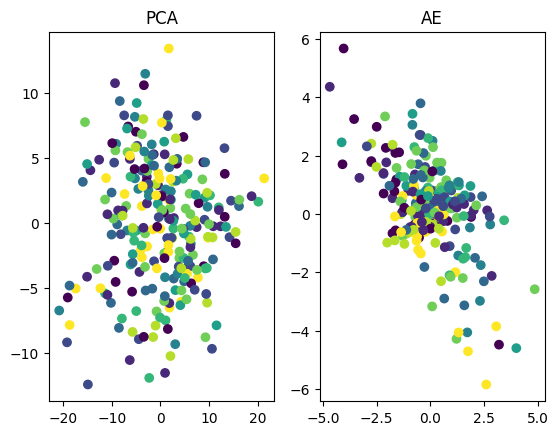

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title('PCA')
plt.scatter(reduced_image[:, 0], reduced_image[:, 1], c = label.data.cpu().numpy())

plt.subplot(1, 2, 2)
plt.title('AE')
# encoded_img = encoded_img.data.cpu().numpy()
plt.scatter(encoded_img[:,0], encoded_img[:,1], c=label.data.cpu().numpy())

plt.show()